<a href="https://colab.research.google.com/github/itsvaibhavsharmaji/mlproject/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import json
import pandas as pd
import re
# Specify the path to your Excel file
excel_file_path = r"/content/drive/MyDrive/Hindi Datasset/truecombine.xlsx"
# Load the Excel workbook into a Pandas DataFrame
true_news = pd.read_excel(excel_file_path)

In [9]:
# Specify the path to your Excel file
excel_file_path1 = r"/content/drive/MyDrive/Hindi Datasset/fakecombine.xlsx"
# Load the Excel workbook into a Pandas DataFrame
fake_news = pd.read_excel(excel_file_path1)

In [10]:
fake_news.head()

,Column1,short_description
0,1,गडकरी ने नहीं दिया है पीएम मोदी और राम मंदिर ...
1,2,राम मंदिर वहीं बना है जहां रामलला विराजमान थे...
2,3,"यूपी में बोर्ड की परीक्षा नहीं हुई है रद्द, य..."
3,4,"नेपाल से अयोध्या के जुलूस का नहीं, ये ग्रेटर ..."
4,5,एमपी का सीएम बनने के बाद मोहन यादव ने दी जनता...


In [11]:
true_news=true_news.drop(['Column1'],axis=1)
fake_news=fake_news.drop(['Column1'],axis=1)

In [12]:
true_news.head()

,short_description
0,राम मंदिर प्राण-प्रतिष्ठा: फर्श पर सोना-नारियल...
1,Ayodhya Ram Mandir Pran Pratishtha से पहले कठि...
2,8 PHOTOS:देखें रामलला की प्राण-प्रतिष्ठा से पह...
3,"22 जनवरी को अयोध्या में कैसा रहेगा मौसम, जानें..."
4,"सोलापुर में PM की 15 बड़ी बातें, मोदी के 22 जन..."


In [13]:
fake_news=fake_news.dropna()
true_news=true_news.dropna()

In [14]:

import re

for i in list(true_news):
    # Define a list of characters to remove
    characters_to_remove = ['|', '?', ':', ';', "'", '"', ',', '.', '(', ')', '\n', '&','।']

    # Use a regular expression to replace all characters in the list
    pattern = '|'.join(map(re.escape, characters_to_remove))
    true_news[i] = true_news[i].str.replace(pattern, '', regex=True)

In [15]:
import re

for j in list(fake_news):
    # Define a list of characters to remove
    characters_to_remove = ['|', '?', ':', ';', "'", '"', ',', '.', '(', ')', '\n', '&','।']

    # Use a regular expression to replace all characters in the list
    pattern = '|'.join(map(re.escape, characters_to_remove))
    fake_news[j] = fake_news[j].str.replace(pattern, '', regex=True)

In [16]:
#Stemming defibe a funct ste which will we take wors at a time
suffixes = {
    1: ["ो", "े", "ू", "ु", "ी", "ि", "ा"],
    2: ["कर", "ाओ", "िए", "ाई", "ाए", "ने", "नी", "ना", "ते", "ीं", "ती", "ता", "ाँ", "ां", "ों", "ें"],
    3: ["ाकर", "ाइए", "ाईं", "ाया", "ेगी", "ेगा", "ोगी", "ोगे", "ाने", "ाना", "ाते", "ाती", "ाता", "तीं", "ाओं", "ाएं", "ुओं", "ुएं", "ुआं"],
    4: ["ाएगी", "ाएगा", "ाओगी", "ाओगे", "एंगी", "ेंगी", "एंगे", "ेंगे", "ूंगी", "ूंगा", "ातीं", "नाओं", "नाएं", "ताओं", "ताएं", "ियाँ", "ियों", "ियां"],
    5: ["ाएंगी", "ाएंगे", "ाऊंगी", "ाऊंगा", "ाइयाँ", "ाइयों", "ाइयां"],
}

def hi_stem(word):
    for L in 5, 4, 3, 2, 1:
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

In [17]:
id=list(fake_news.index)
id1=list(true_news.index)

In [18]:
str_temp=""
count=0
for i in list(fake_news):
  count=0
  for j in list(fake_news[i]):
    for words in j.split():
      str_temp+=hi_stem(words)
      str_temp+=" "
    fake_news.loc[id[count],i]=str_temp
    str_temp=""
    count+=1

In [19]:
str_temp=""
count=0
for i in list(true_news):
  count=0
  for j in list(true_news[i]):
    for words in j.split():
      str_temp+=hi_stem(words)
      str_temp+=" "
    true_news.loc[id1[count],i]=str_temp
    str_temp=""
    count+=1

In [20]:
true_news

,short_description
0,राम मंदिर प्राण-प्रतिष्ठ फर्श पर सोना-नारियल प...
1,Ayodhya Ram Mandir Pran Pratishtha से पहल कठिन...
2,8 PHOTOSदेख रामलल की प्राण-प्रतिष्ठ से पहल कैस...
3,22 जनवर को अयोध्य में कैस रह मौसम जान क्य है I...
4,सोलापुर में PM की 15 बड़ बात मोद के 22 जनवर बो...
...,...
4015,प्राण प्रतिष्ठ की अयोध्य से ले कैलिफोर्निय तक ...
4016,छक्क जड़ पर मिल 12 रन जल्द आएग नय नियम! रोहित ...
4017,Power Consumption चाल वित्त वर्ष की अप्रैल-दिस...
4018,Entertainment Top 5 News 21 Jan फाइटर में किए ...


In [21]:
stop =  open(r"/content/drive/MyDrive/Hindi Datasset/final_stopwords.txt", encoding="utf-8")
stopwords=[]
for x in stop:
  x = x.replace('\n', '')
  stopwords.append(x)

In [22]:
str_temp = ""
count = 0

for i in list(fake_news):
    count = 0
    for j in list(fake_news[i]):
        for words in j.split():
            if words not in stopwords:  # Remove 'unicode' here
                str_temp += words
                str_temp += " "
        fake_news.loc[id[count], i] = str_temp
        str_temp = ""
        count += 1

In [23]:
str_temp = ""
count = 0

for i in list(true_news):
    count = 0
    for j in list(true_news[i]):
        for words in j.split():
            if words not in stopwords:  # Remove 'unicode' here
                str_temp += words
                str_temp += " "
        true_news.loc[id1[count], i] = str_temp
        str_temp = ""
        count += 1

In [24]:
fake_news.head()

,short_description
0,गडकर नह दिय पीएम मोद राम मंदिर जुड़ विवादित बयान
1,राम मंदिर बन जह रामलल विराजमान बाबर तीन किलोमी...
2,यूप बोर्ड परीक्ष नह रद्द वीडिय पूर फर्ज
3,नेपाल अयोध्य के जुलूस नह ग्रेटर नोएड कलश यात्र...
4,एमप सीएम बन के मोहन यादव दी जन गाल वीडिय सच


In [25]:
true_news['label']=1
fake_news['label']=0
news = pd.concat([fake_news, true_news])

In [ ]:
# # make both length equal
# if len(fake_news) > len(true_news):
#   fake_news = fake_news.head(len(true_news))
# elif len(true_news) > len(fake_news):
#   true_news = true_news.head(len(fake_news))
# print("Length of fake news: ", len(fake_news))
# print("Length of true news: ", len(true_news))

In [26]:
news.tail()

,short_description,label
4015,प्राण प्रतिष्ठ अयोध्य ले कैलिफोर्निय धूम कार र...,1
4016,छक्क जड़ मिल 12 रन जल्द आएग नय नियम! रोहित के ...,1
4017,Power Consumption चाल वित्त वर्ष अप्रैल-दिसंबर...,1
4018,Entertainment Top 5 News 21 Jan फाइटर बड़ बदला...,1
4019,Ram Mandir के सालार के मेकर्स तैयार किय रामचंद...,1


In [27]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [28]:
import tensorflow as tf
# Get the GPU device name.
device_name = tf.test.gpu_device_name()
# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [29]:
import torch
# If there's a GPU available...
if torch.cuda.is_available():
    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [30]:
!pip install transformers

In [32]:
#split train test
from sklearn.model_selection import train_test_split
train, test, labels, y_test = train_test_split(news, news['label'], test_size=0.2, stratify=news['label'],random_state=123, shuffle=True)

sentences = train.short_description.values
labels=labels.values

In [33]:
from transformers import ElectraTokenizer
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = ElectraTokenizer.from_pretrained('monsoon-nlp/hindi-tpu-electra', do_lower_case=True) #bert-base-uncased

Loading BERT tokenizer...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/607k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/736 [00:00<?, ?B/s]

In [34]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:
    # `encode` will:  (1) Tokenize the sentence.   (2) Prepend the `[CLS]` token to the start.  (3) Append the `[SEP]` token to the end. (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,
                        add_special_tokens = True,  # Add '[CLS]' and '[SEP]'
                        # max_length = 64,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)
# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  संजय सिंह जिनक अध्यक्ष बन साक्ष मलिक विनेश फूट-फूट रो लग 
Token IDs: [3, 9988, 2571, 2438, 1017, 3715, 2214, 4734, 10488, 4205, 1949, 13400, 17, 13400, 3348, 2065, 4]


<Axes: >

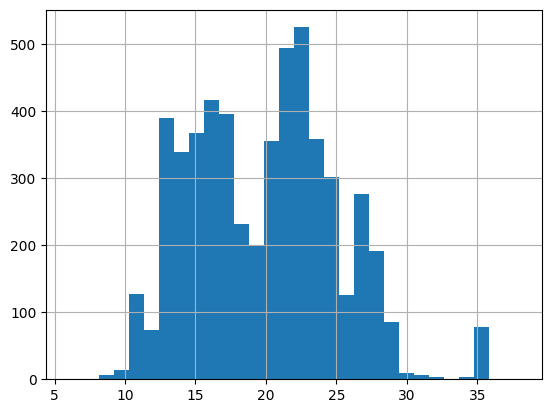

In [35]:
seq_len = [len(sen) for sen in input_ids]
pd.Series(seq_len).hist(bins = 30)

In [36]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  38


In [37]:
# We'll borrow the `pad_sequences` utility function to do padding.
from keras.preprocessing.sequence import pad_sequences
# Set the maximum sequence length as 128 , as it should be slightly above 105
MAX_LEN = 96
print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)
print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))
# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence, as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long",
                          value=0, truncating="post", padding="post")
print('\Done.')


Padding/truncating all sentences to 96 values...

Padding token: "[PAD]", ID: 2
\Done.


In [38]:
# Create attention masks
attention_masks = []
for sent in input_ids:

    # Create the attention mask. If a token ID is 0, then it's padding, set the mask to 0. If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]

    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [39]:
# Use train_test_split to split our data into train and validation sets for training, 10% validation
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels,
                                                            random_state=123, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=123, test_size=0.1)

In [40]:
# Convert all inputs and labels into torch tensors, the required datatype for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [41]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# The DataLoader needs to know our batch size for training, so we specify it here.
batch_size = 32
# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [42]:
from transformers import  ElectraForSequenceClassification, AdamW, BertConfig
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model =  ElectraForSequenceClassification.from_pretrained(
    "monsoon-nlp/hindi-tpu-electra", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
# Tell pytorch to run this model on the GPU.
model.cuda()

pytorch_model.bin:   0%|          | 0.00/466M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monsoon-nlp/hindi-tpu-electra and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(39628, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [43]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

electra.embeddings.word_embeddings.weight               (39628, 768)
electra.embeddings.position_embeddings.weight             (512, 768)
electra.embeddings.token_type_embeddings.weight             (2, 768)
electra.embeddings.LayerNorm.weight                           (768,)
electra.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

electra.encoder.layer.0.attention.self.query.weight       (768, 768)
electra.encoder.layer.0.attention.self.query.bias             (768,)
electra.encoder.layer.0.attention.self.key.weight         (768, 768)
electra.encoder.layer.0.attention.self.key.bias               (768,)
electra.encoder.layer.0.attention.self.value.weight       (768, 768)
electra.encoder.layer.0.attention.self.value.bias             (768,)
electra.encoder.layer.0.attention.output.dense.weight     (768, 768)
electra.encoder.layer.0.attention.output.dense.bias           (

In [44]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

epochs = 5
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [45]:
import numpy as np
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [46]:
import time
import datetime
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [47]:
import random
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128
# Set the seed value all over the place to make this reproducible.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
# Store the average loss after each epoch so we can plot them.
loss_values = []
start=time.time()
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    t0 = time.time()
    total_loss = 0
    model.train()
    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # Unpack this training batch from our dataloader.
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Always clear any previously calculated gradients before performing a backward pass.

        model.zero_grad()
        # Perform a forward pass .This will return the loss .
        outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)

        # The call to `model` always returns a tuple, so we need to pull the loss value out of the tuple.
        loss = outputs[0]
        # Accumulate the training loss over all of the batches so that we can calculate the average loss at the end. `loss` is a Tensor containing a single value
        total_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0. This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently during evaluation.
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for batch in validation_dataloader:

        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)

        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients, saving memory and  speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions. This will return the logits rather than the loss because we have not provided labels.
            # token_type_ids is the same as the "segment ids"
            outputs = model(b_input_ids,
                            token_type_ids=None,
                            attention_mask=b_input_mask)

        # Get the "logits" output by the model.
        logits = outputs[0]
        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)

        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy
        # Track the number of batches
        nb_eval_steps += 1
    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
print("")
print("Training complete!")
end=time.time()


======== Epoch 1 / 5 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:21.
  Batch    80  of    152.    Elapsed: 0:00:41.
  Batch   120  of    152.    Elapsed: 0:01:02.

  Average training loss: 0.69
  Training epcoh took: 0:01:18

Running Validation...
  Accuracy: 0.58
  Validation took: 0:00:03

======== Epoch 2 / 5 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:20.
  Batch    80  of    152.    Elapsed: 0:00:40.
  Batch   120  of    152.    Elapsed: 0:01:00.

  Average training loss: 0.68
  Training epcoh took: 0:01:16

Running Validation...
  Accuracy: 0.58
  Validation took: 0:00:03

======== Epoch 3 / 5 ========
Training...
  Batch    40  of    152.    Elapsed: 0:00:20.
  Batch    80  of    152.    Elapsed: 0:00:40.
  Batch   120  of    152.    Elapsed: 0:01:00.

  Average training loss: 0.67
  Training epcoh took: 0:01:16

Running Validation...
  Accuracy: 0.58
  Validation took: 0:00:03

======== Epoch 4 / 5 ========
Training...
  Batch    40  of 

In [48]:
import plotly.express as px
f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

In [49]:
sentences = test.short_description.values
labels = y_test.values
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
for sent in sentences:

    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 256
                   )

    input_ids.append(encoded_sent)
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN,
                          dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)
# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)
# Set the batch size.
batch_size = 32
# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [50]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
# Put model in evaluation mode
model.eval()

predictions , true_labels = [], []
# Predict
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch


  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)
  logits = outputs[0]
  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)
print('DONE.')

Predicting labels for 1,345 test sentences...
DONE.


In [51]:
count=0
guesses=[]
actual=[]
# For each input batch...
for i in range(len(true_labels)):

  # The predictions for this batch are a 2-column ndarray (one column for "0" and one column for "1"). Pick the label with the highest value and turn this in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()


  #calculate accuracy
  for j in range(len(pred_labels_i)):
    if(pred_labels_i[j]==true_labels[i][j]):
      count+=1
    guesses.append(pred_labels_i[j])
    actual.append(true_labels[i][j])


accuracy = count/len(y_test)

In [52]:
print(accuracy)

0.5977695167286246


In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


print(accuracy_score(actual, guesses))
print(recall_score(actual, guesses))
print(precision_score(actual, guesses))
print(f1_score(actual, guesses))

0.5977695167286246
1.0
0.5977695167286246
0.7482550023266635
